## Voice-Driven Disease Classification: A Deep Learning Approach

##### Team 34 : Jules Maglione, Paul Nadal

In [1]:
import os
import pandas as pd
import seaborn as sns
from math import ceil, sqrt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
DATA_DIR = './data/'
RECORDINGS_DIR = DATA_DIR + 'recordings/'

## 0. Dataset

> You can download the "Medical Speech, Transcription, and Intent" dataset from this [link](https://www.kaggle.com/datasets/paultimothymooney/medical-speech-transcription-and-intent/download?datasetVersionNumber=1). The dataset is approximately 6GB in size and includes thousands of audio utterances related to common medical symptoms such as "knee pain" or "headache." In total, the dataset comprises over 8 hours of aggregated audio content. Each utterance has been created by individual human contributors, who based their recordings on specific medical symptoms. This extensive collection of audio snippets is suitable for training conversational agents in the medical field.

#### 0.1 Load data

In [3]:
# Load the metadata from the CSV file

record_df = pd.read_csv(DATA_DIR + "overview-of-recordings.csv", sep=",")

print("Overview of recordings: ")
print("Number of recordings: ", len(record_df))
print("Number of features: ", len(record_df.columns))

Overview of recordings: 
Number of recordings:  6661
Number of features:  13


#### 0.2 Split data

In [4]:
# Add a column to categorize the recordings

train_files = set(os.listdir(os.path.join(RECORDINGS_DIR, "train")))
valid_files = set(os.listdir(os.path.join(RECORDINGS_DIR, "validate")))
test_files = set(os.listdir(os.path.join(RECORDINGS_DIR, "test")))

record_df["split"] = record_df.file_name.apply(lambda x: "train" if x in train_files else ("validate" if x in valid_files else "test"))

# Check the distribution of the recordings

print("Number of training samples: ", len(record_df[record_df.split == "train"]))
print("Number of validation samples: ", len(record_df[record_df.split == "validate"]))
print("Number of test samples: ", len(record_df[record_df.split == "test"]))

Number of training samples:  5895
Number of validation samples:  385
Number of test samples:  381


In [9]:
# Create a dictionary mapping each prompt to an integer
prompt_to_id = {prompt: i for i, prompt in enumerate(record_df.prompt.unique())}
record_df["label"] = record_df.prompt.apply(lambda x: prompt_to_id[x])

# Display the mapping
print("Prompt to ID mapping: ")
for prompt, id in prompt_to_id.items():
    print(prompt, ":", id)

Prompt to ID mapping: 
Emotional pain : 0
Hair falling out : 1
Heart hurts : 2
Infected wound : 3
Foot ache : 4
Shoulder pain : 5
Injury from sports : 6
Skin issue : 7
Stomach ache : 8
Knee pain : 9
Joint pain : 10
Hard to breath : 11
Head ache : 12
Body feels weak : 13
Feeling dizzy : 14
Back pain : 15
Open wound : 16
Internal pain : 17
Blurry vision : 18
Acne : 19
Muscle pain : 20
Neck pain : 21
Cough : 22
Ear ache : 23
Feeling cold : 24


In [6]:
# Save the updated CSV file 
record_df.to_csv(DATA_DIR + "overview-of-recordings-label.csv", index=False)

#### 0.3 Visualize data

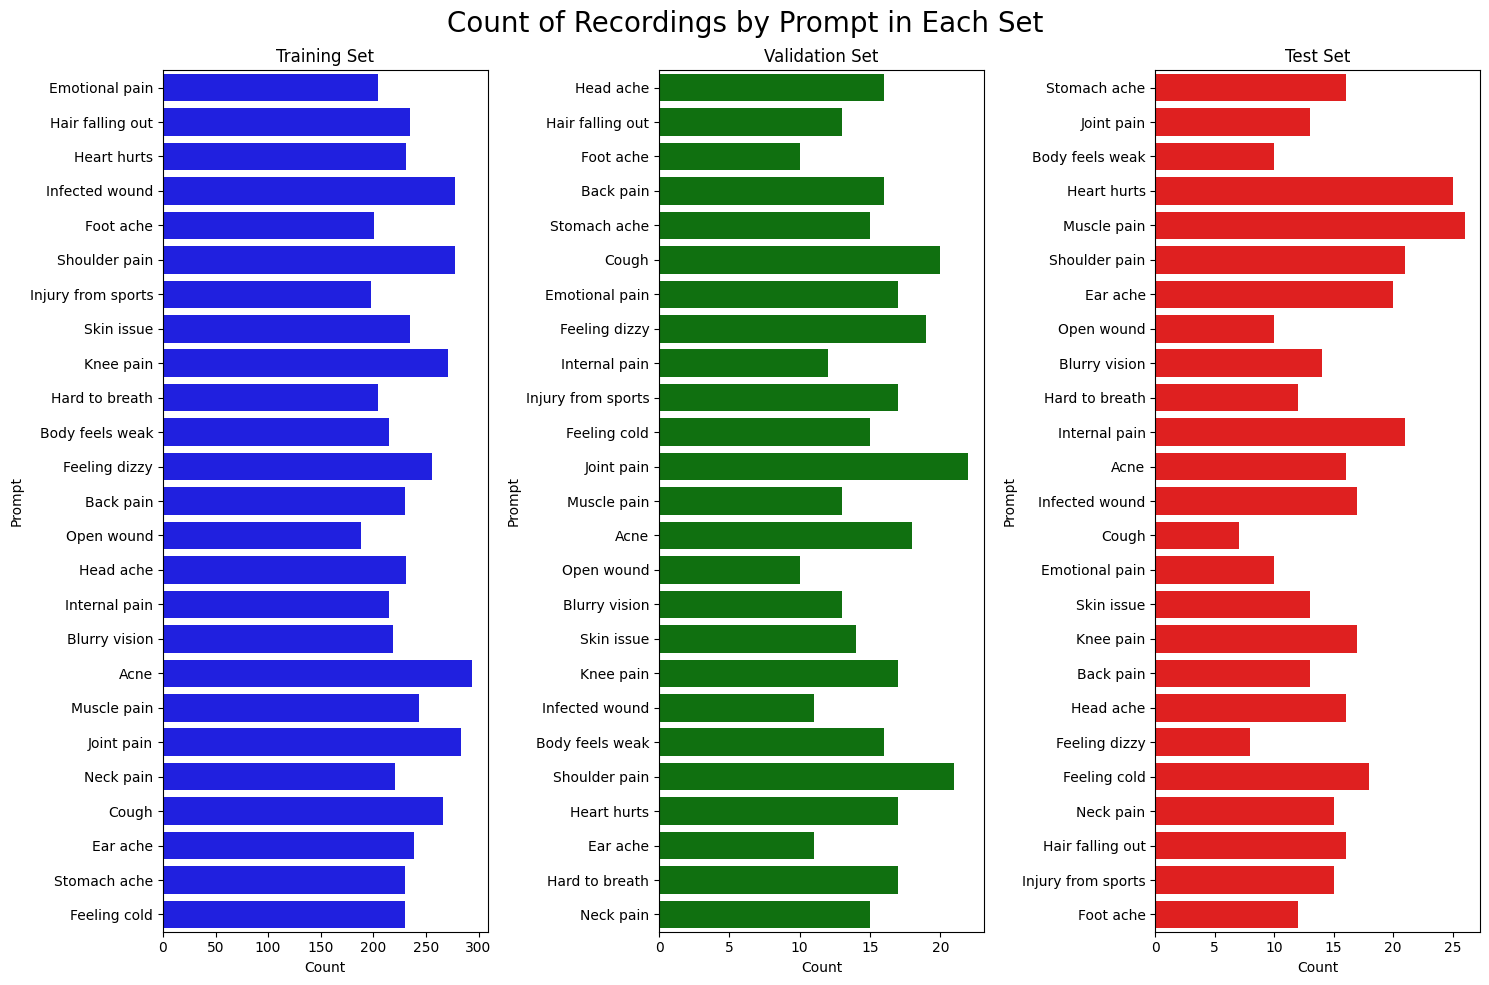

In [7]:
# Create train, validation, and test dataframes
train_df = record_df[record_df['split'] == 'train']
valid_df = record_df[record_df['split'] == 'validate']
test_df = record_df[record_df['split'] == 'test']

# Create a function to plot the count of each prompt
def create_count_plot(ax, df, title, color):
    sns.countplot(y='prompt', data=df, color=color, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Count')
    ax.set_ylabel('Prompt')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# Combine the count plots on the same row
create_count_plot(axes[0], train_df, 'Training Set', 'blue')
create_count_plot(axes[1], valid_df, 'Validation Set', 'green')
create_count_plot(axes[2], test_df, 'Test Set', 'red')

# Adjust layout for better visualization
plt.suptitle('Count of Recordings by Prompt in Each Set', fontsize=20)
plt.tight_layout()
plt.show()

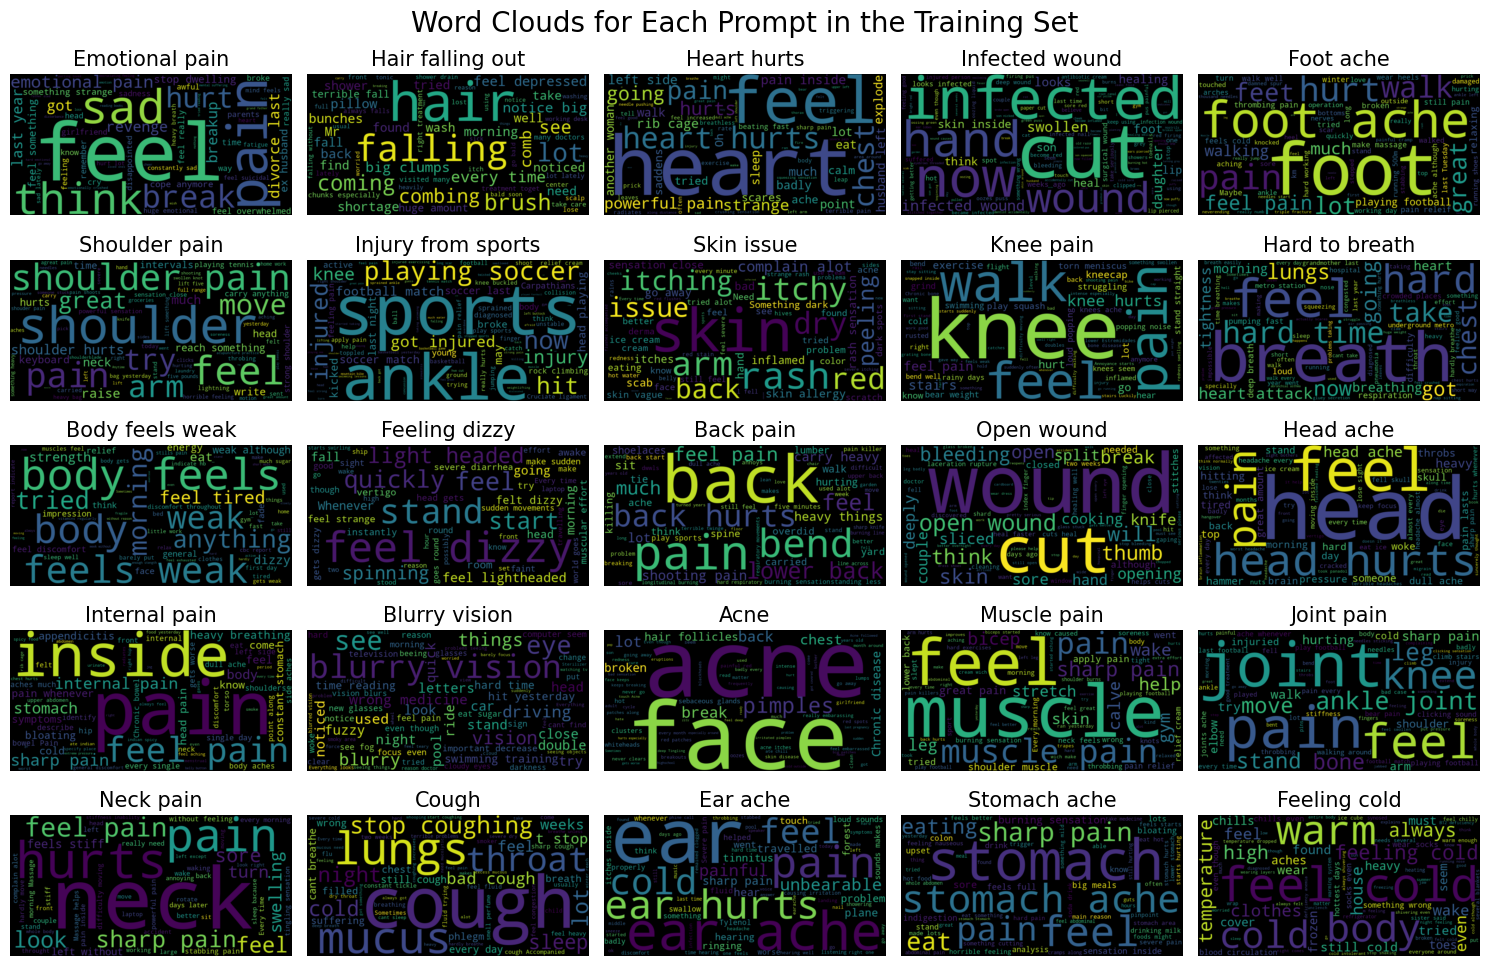

In [8]:
# Combine all phrases from the training set
all_phrases = ' '.join(train_df['phrase'])

# Get unique prompts in the training set
unique_prompts = train_df['prompt'].unique()

# Calculate the number of rows and columns for the subplot grid
num_prompts = len(unique_prompts)
cols = ceil(sqrt(num_prompts))
rows = ceil(num_prompts / cols)

# Create a figure with subplots
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

# Generate and display word clouds for each unique prompt
for ax, prompt in zip(axs.flatten(), unique_prompts):
    prompt_phrases = ' '.join(train_df[train_df['prompt'] == prompt]['phrase'])
    wordcloud = WordCloud(width=800, height=400).generate(prompt_phrases)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis("off")
    ax.set_title(prompt, fontsize=15)

# Remove empty subplots if there are more than needed
for ax in axs.flatten()[num_prompts:]:
    fig.delaxes(ax)

# Adjust layout for better visualization
fig.suptitle('Word Clouds for Each Prompt in the Training Set', fontsize=20)
plt.tight_layout()
plt.show()

## 1. Audio classification

#### 1.1 Train models

> See [part1.ipynb](./part1.ipynb) to know more about this part.

#### 1.2 Visualize Results

In [ ]:
# TODO: Plot model performance metrics

#### 1.3 Experiment by yourself

In [ ]:
# TODO: Create small example where user can record their own voice and see the model's prediction

## 2. Text classification

#### 2.1 Train models

> See [part2.ipynb](./part2.ipynb) to know more about this part.

#### 2.2 Visualize Results

In [ ]:
# TODO: Plot model performance metrics

#### 2.3 Experiment by yourself

In [ ]:
# TODO: Create small example where user can enter a phrase and see the model's prediction

## 3. Audio to text classification

#### 3.1 Train models

> See [part3.ipynb](./part3.ipynb) to know more about this part.

#### 3.2 Visualize Results

In [ ]:
# TODO: Plot model performance metrics

#### 3.3 Experiment by yourself

In [ ]:
# TODO: Create small example where user can record their own voice and see the model's prediction